<a href="https://colab.research.google.com/github/YawarRizwan/Machine_Learning/blob/main/Cumulative%20Accuracy%20Profile%20(CAP)%20Curve%20Analysis%20to%20Evaluate%20Classification%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cumulative Accuracy Profile (CAP) Curve Analysis to Evaluate Classification Models in Social Network Ads Prediction**

# Import the required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the dataset and define the input and output features

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Define the Random Forest model, train the model and make prediction on test data

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

#Define the Logsistic Regression model, train the model and make prediction on test data

In [8]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)

#Define the KNN model, train the model and make prediction on test data

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

#Define the Naive Bayes model, train the model and make prediction on test data

In [10]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

#Visualize the CAP Curve Analysis including all 4 classification models

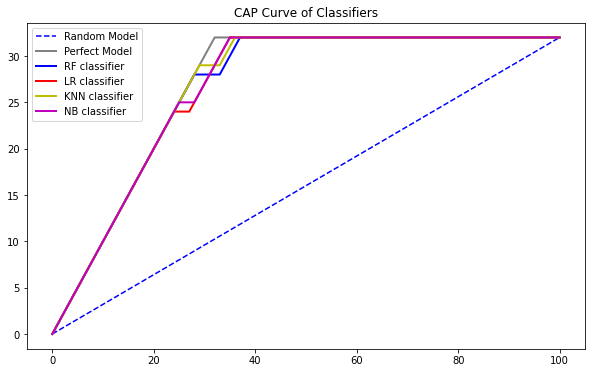

In [11]:
total = len(y_test) 
one_count = np.sum(y_test) 
zero_count = total - one_count 
lm_rf = [y for _, y in sorted(zip(y_pred_rf, y_test), reverse = True)]
lm_lr = [y for _, y in sorted(zip(y_pred_lr, y_test), reverse = True)] 
lm_knn = [y for _, y in sorted(zip(y_pred_knn, y_test), reverse = True)] 
lm_nb = [y for _, y in sorted(zip(y_pred_nb, y_test), reverse = True)] 
x = np.arange(0, total + 1) 
y_rf = np.append([0], np.cumsum(lm_rf)) 
y_lr = np.append([0], np.cumsum(lm_lr)) 
y_knn = np.append([0], np.cumsum(lm_knn)) 
y_nb = np.append([0], np.cumsum(lm_nb)) 
plt.figure(figsize = (10, 6)) 
plt.plot([0, total], [0, one_count], c = 'b', linestyle = '--', label = 'Random Model')
plt.plot([0, one_count, total], [0, one_count, one_count], c = 'grey', linewidth = 2, label = 'Perfect Model')
plt.title('CAP Curve of Classifiers')
plt.plot(x, y_rf, c = 'b', label = 'RF classifier', linewidth = 2)
plt.plot(x, y_lr, c = 'r', label = 'LR classifier', linewidth = 2)
plt.plot(x, y_knn, c = 'y', label = 'KNN classifier', linewidth = 2)
plt.plot(x, y_nb, c = 'm', label = 'NB classifier', linewidth = 2)
plt.legend()